In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dtf = pd.read_csv('C:/files/USS/Geotagged-Web-Tweets-/Machine learning/data_stores.csv')

In [6]:

dtf = dtf[dtf["City"]=="Las Vegas"][["City","Street Address","Longitude","Latitude"]].reset_index(drop=True)
dtf = dtf.reset_index().rename(columns={"index":"id"})
dtf.head()

,id,City,Street Address,Longitude,Latitude
0,0,Las Vegas,4507 Flamingo Rd,-115.20,36.12
1,1,Las Vegas,"475 E Windmill Lane, Fashion Show",-115.15,36.04
2,2,Las Vegas,"3200 LAS VEGAS BLVD. S., STE 1795",-115.17,36.13
3,3,Las Vegas,8350 W Cheyenne Ave,-115.28,36.22
4,4,Las Vegas,3730 LAS VEGAS BLVD S,-115.18,36.11


In [7]:
!pip install py-ml-utils

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for py-ml-utils: filename=py_ml_utils-0.1.0-py3-none-any.whl size=2429 sha256=d7ca684f514a89d57d25c5898ca4799dff5a1473461076dc60108a53b9f57f31
  Stored in directory: c:\users\bisht\appdata\local\pip\cache\wheels\93\b2\35\155972d21fa60cbec562192dcc08da70240ffa6a357cdf00fc
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=f787d29b201ef9dab697aee194d8547b977c1526a2a33cd28d378f37fce20f54
  Stored in directory: c:\users\bisht\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built py-ml-utils sklearn


In [8]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *

In [9]:

# simulate data 
dtf["Potential"] = np.random.randint(low=3, high=10+1, size=len(dtf))
dtf["Staff"] = dtf["Potential"].apply(lambda x: int(np.random.rand()*x)+1)
dtf["Capacity"] = dtf["Potential"] - dtf["Staff"]
dtf["Cost"] = np.random.choice(["high","medium","low"], size=len(dtf), p=[0.4,0.5,0.1])
dtf.head()

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost
0,0,Las Vegas,4507 Flamingo Rd,-115.20,36.12,6,5,1,high
1,1,Las Vegas,"475 E Windmill Lane, Fashion Show",-115.15,36.04,6,1,5,high
2,2,Las Vegas,"3200 LAS VEGAS BLVD. S., STE 1795",-115.17,36.13,7,7,0,low
3,3,Las Vegas,8350 W Cheyenne Ave,-115.28,36.22,10,2,8,medium
4,4,Las Vegas,3730 LAS VEGAS BLVD S,-115.18,36.11,9,7,2,medium


In [10]:
dtf['Latitude'] = dtf['Latitude'].astype(float).fillna(0)
dtf['Longitude'] = dtf['Longitude'].astype(float).fillna(0)

In [11]:
dtf['Longitude'].dtype

dtype('float64')

In [12]:
!pip install df-overview

  Created wheel for df-overview: filename=df_overview-0.3-py3-none-any.whl size=2007 sha256=a9060dc1f0106683ce9c5d545c5526b976903dabf9dc5e9a39632f64a39c08ab
  Stored in directory: c:\users\bisht\appdata\local\pip\cache\wheels\e5\8b\4e\1e122a890c8b247ea14798b29559fa1f68704b696b76761f0b
Successfully built df-overview


In [13]:
!pip install geopy

In [14]:
from geopy.geocoders import Nominatim
city = "Delhi"
## get location
locator = Nominatim(user_agent="MyCoder")
location = [36.114647, -115.172813]
print(location)
# print((location.latitude, location.longitude))

[36.114647, -115.172813]


In [18]:
!pip install folium

  Using cached folium-0.12.1.post1-py2.py3-none-any.whl (95 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [19]:
import folium

In [22]:
map_ = folium.Map(location=[28.7041, 77.1025])
map_

In [23]:
from sklearn.preprocessing import MinMaxScaler
x, y = "Latitude", "Longitude"
color = "Cost"
size = "Staff"
popup = "Street Address"
data = dtf.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(dtf[color].unique()))
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron", zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_

Clustering

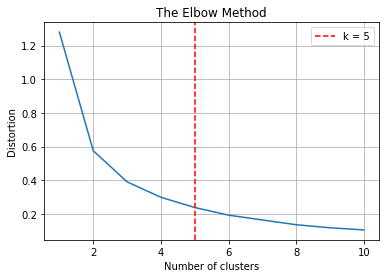

In [24]:
from sklearn.cluster import KMeans
X = dtf[["Latitude","Longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

We can try with k = 5 so that the K-Means algorithm will find 5 theoretical centroids. In addition, I will identify the real centroids too (the closest observation to the cluster center).

In [25]:
from scipy.cluster.vq import vq

In [26]:

k = 5
model = KMeans(n_clusters=k, init='k-means++')
X = dtf[["Latitude","Longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = vq(model.cluster_centers_, dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
dtf[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
dtf.sample(5)

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,cluster,centroids
151,151,Las Vegas,3850 Las Vegas Blvd So,-115.18,36.10,7,5,2,medium,3,0
31,31,Las Vegas,"10520 Southern Highlands Pkwy, #100",-115.21,36.00,6,4,2,high,0,0
136,136,Las Vegas,4800 S. Eastern Avenue,-115.12,36.10,3,3,0,high,2,0
152,152,Las Vegas,4850 West Craig Road,-115.21,36.24,4,2,2,medium,4,0
79,79,Las Vegas,5757 Wayne Newton Blvd,-115.15,36.08,7,5,2,low,3,0


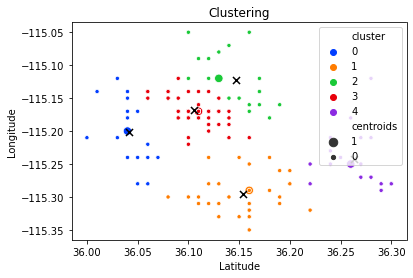

In [27]:
## plot
import seaborn as sns
fig, ax = plt.subplots()
sns.scatterplot(x="Latitude", y="Longitude", data=dtf, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

Affinity Propagation

In [28]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation()

Text(0.5, 1.0, 'Clustering')

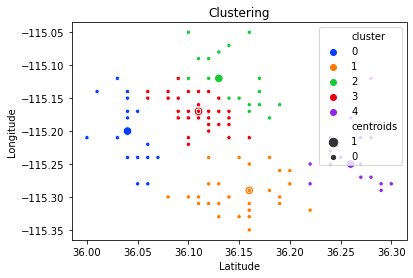

In [29]:
k = dtf["cluster"].nunique()
sns.scatterplot(x="Latitude", y="Longitude", data=dtf, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering')

Self Organizing Maps

In [30]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8609 sha256=7937a0dc24acfcf07a0080081c291b9202c749bcd6885dc2b2df0a3bce1f9120
  Stored in directory: c:\users\bisht\appdata\local\pip\cache\wheels\b2\b8\f9\08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built minisom


In [31]:
x, y = "Latitude", "Longitude"
color = "cluster"
size = "Staff"
popup = "Street Address"
marker = "centroids"
data = dtf.copy()

In [32]:
from sklearn.preprocessing import MinMaxScaler

## create color column
lst_elements = sorted(list(dtf[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(dtf[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           popup=row[popup],icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_

this was how to use Clustering and Geospatial Analysis for event detection is done